In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('Test3_Full_Original.csv',
            delimiter=',', names=['x', 'y', 'Magicv2', 'localization4', 'localizationlab', 'Magicv2_5g', 'UVIC_Eduroam1', 'UVIC_Eduroam2', 'localization3', 'localization_lab5g', 'localization1', 'localization4_5g', 'UVIC_Eduroam3', 'localization2', 'localization3_5g', 'UVIC_Eduroam4', 'localization1_5g'])
df = df.loc[:,['x','y','Magicv2', 'localization4', 'localizationlab', 'Magicv2_5g', 
       'localization3', 'localization_lab5g', 'localization1', 'localization4_5g', 'localization2',
       'localization3_5g', 'localization1_5g']]

df['Average'] = (df.Magicv2 + df.localization4 + df.localizationlab + df.Magicv2_5g + df.localization3 + df.localization_lab5g + df.localization1 + df.localization4_5g + df.localization2 + df.localization3_5g + df.localization1_5g)/11

In [15]:
X = df.drop('Average', axis = 1)
y = df['Average']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [17]:
RandomForestRegModel = RandomForestRegressor()
RandomForestRegModel.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [18]:
y_pred = RandomForestRegModel.predict(x_test)
y_pred

array([-74.16545455, -74.10454545, -74.02181818, -74.03545455,
       -74.40181818, -75.87454545, -75.97727273, -75.89181818,
       -75.89181818, -75.59181818, -75.74909091, -75.90727273,
       -75.93545455, -76.00454545, -75.95909091, -75.96727273,
       -76.03363636, -74.53181818, -74.52909091, -74.52909091,
       -74.39818182, -74.40090909, -74.28545455, -74.28272727,
       -76.57545455, -74.04727273, -73.96454545, -73.94363636,
       -73.92      , -73.92      , -74.21818182, -74.21818182,
       -74.21818182, -73.95      , -73.95454545, -73.94545455,
       -74.14636364, -74.10909091, -74.04727273, -74.04727273,
       -74.04727273, -73.94363636, -73.94363636, -73.94363636,
       -74.15181818, -74.17727273, -74.18181818, -74.18181818,
       -74.13909091, -74.00818182, -73.97545455, -74.04181818,
       -74.04      , -75.81727273, -73.90909091, -73.86272727,
       -73.95181818, -73.85636364, -73.92636364, -73.85636364,
       -73.85636364, -73.85636364, -74.15636364, -74.04

In [19]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

2.0317945162536466

In [20]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
496,-74.090909,-74.165455
497,-74.181818,-74.104545
498,-74.090909,-74.021818
499,-74.181818,-74.035455
500,-75.000000,-74.401818
...,...,...
615,-70.363636,-74.101818
616,-70.181818,-74.101818
617,-70.454545,-74.101818
618,-70.363636,-74.101818


In [21]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 1.6598753665689232
Mean Squared Error: 4.1281889562783896
Root Mean Squared Error: 2.0317945162536466


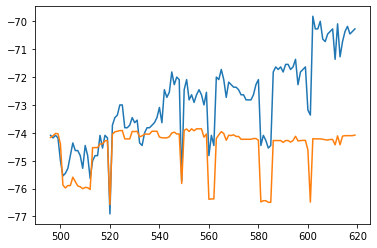

In [22]:
plt.plot(df.Actual.index, df.Actual)
plt.plot(df.Actual.index, df.Predicted)

plt.show()